In [1]:
%matplotlib inline

import pickle

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("disney_movie_data_final(modified).csv")
#df.head(1)

In [3]:
#df.head().T

In [4]:
df = df.drop('Unnamed: 0', axis=1)
#df.head()

### Clean the release date and separate the first release with other ones

In [5]:
# Clean empty row
# df = df.drop(832)
# df = df.drop(2840)
# df = df.drop(1450)

In [6]:
df['Release date'][0]

"['March 10, 1918 (New York City premiere)', 'April 29, 1918 (general)']"

In [7]:
df['Release date'] = df['Release date'].fillna('NaN')

In [8]:
def clean_name(x):
    name = x.split('(')
    name = name[0].replace("[", '')
    name = name.replace("'", '')
    name = name.replace("]", '')
    name = name.replace('"', '')
    name = name.replace('\xa0', ' ')
    name = name.replace('U.S.', '')
    name = name.replace('US', '')
    name = name.replace('-', ' ')
    return name.strip(" ")

df['First_release_date'] = df['Release date'].apply(lambda x: clean_name(x))

In [9]:
# for i in (df['First_releas_date']):
#     print(i)

In [10]:
def fine_date(x):
    x = x.replace('\\xa0', ' ')
    print(x)
    if x.split(','):
        first_releas_date = x.split(',')
        if len(first_releas_date)>1:           
            return(first_releas_date[0]+first_releas_date[1]).strip(" ")
        else:
            return x
    else:
        return x

df['First_release_date'] = df['First_release_date'].apply(lambda x: fine_date(x))

March 10, 1918
2 Nov 18
May 1919
June 1, 1919
1920
April 2, 1920
December 25, 1921
July 1921
December 25, 1921
March 26, 1922
September 24, 1922
November 1, 1922
January 1, 1923
December 24, 1922
March 4, 1923
March 15, 1923
March 1923
April 25, 1923
July 1, 1923
August 19, 1923
August 21, 1923
September 22, 1923
November 4, 1923
December 8, 1923
December 9, 1923
January 12, 1924
February 2, 1924
February 9, 1924
February 3, 1924
March 30, 1924
May 1, 1924
May 31, 1924
June 15, 1924
July 1, 1924
July 20, 1924
August 1, 1924
August 10, 1924
August 25, 1924
September 1, 1924
October 2, 1924
November 2, 1924
1 Nov 24
November 16, 1924
November 26, 1924
December 1, 1924
December 18, 1924
January 1, 1925
January 11, 1925
January 30, 1925
March 29, 1925
April 26, 1925
May 16, 1925
June 7, 1925
6 Jul 25
July 13, 1925
July 25, 1925
August 1, 1925
July 12, 1925
September 5, 1925
September 12, 1925
19 Sep 25
26 Sep 25
October 11, 1925
October 24, 1925
October 25, 1925
October 31, 1925
November 7

In [11]:
# for i in (df['First_release_date']):
#     print(i)

In [12]:
np.where(df['First_release_date']=='May 1929 March 1930', )

(array([224], dtype=int64),)

In [13]:
for n, i in enumerate (df['First_release_date']):
    if i == 'May 1929 March 1930':
        print("Yes", n)

Yes 224


In [14]:
 df.First_release_date[224:225]

224    May 1929 March 1930
Name: First_release_date, dtype: object

In [15]:
 df.First_release_date[224:225]= 'May 1929'

<ipython-input-15-f54356d40b9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.First_release_date[224:225]= 'May 1929'


In [16]:
np.where(df['First_release_date']=='January 18 19136', )

(array([621], dtype=int64),)

In [17]:
df.First_release_date[621:622]= 'January 18 1936'

<ipython-input-17-9742f246e75d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.First_release_date[621:622]= 'January 18 1936'


In [18]:
 df.First_release_date[621:622]

621    January 18 1936
Name: First_release_date, dtype: object

In [19]:
np.where(df['First_release_date']=='May 28', )

(array([], dtype=int64),)

In [20]:
df.First_release_date[190:191] = 'May 1928'

<ipython-input-20-e2b33503fbab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.First_release_date[190:191] = 'May 1928'


In [21]:

def change_year01(x, y):
    if y=='df_under_2000':
        date = x.split(' ')
        if len(date) >= 3 and len(date[2])<=2:
            date = date[0]+' '+date[1]+" "+"19"+date[2]
            print(date)
            return date
        else:
            return x
    else:
        date = x.split(' ')
        if len(date) >= 3 and len(date[2])<=2:
            date = date[0]+' '+date[1]+" "+"20"+date[2]
            print(date)
            return date
        else:
            return x

df_under_2000 = df[:2190]
df_above_2000 = df[2190:]
    
df_under_2000['First_release_date'] = df_under_2000['First_release_date'].apply(lambda x :change_year01(x, 'df_under_2000'))
#print('--'*10)
df_above_2000['First_release_date'] = df_above_2000['First_release_date'].apply(lambda x :change_year01(x, 'df_above_2000'))

df = pd.concat([df_under_2000, df_above_2000] )
#df

2 Nov 1918
1 Nov 1924
6 Jul 1925
19 Sep 1925
26 Sep 1925
14 Nov 1925
19 Dec 1925
22 Jan 1926
27 Feb 1926
19 Jun 1926
27 Nov 1926
8 Jan 1929
7 Nov 1927
22 Jan 1927
30 Apr 1927
6 May 1927
4 Jun 1927
24 Sep 1927
22 Oct 1927
12 Nov 1927
26 Nov 1927
3 Dec 1927
24 Dec 1927
14 Jan 1928
10 Mar 1928
28 Mar 1928
12 May 1928
28 May 1928
8 Dec 1928
9 Dec 1928
2 Feb 1929
9 Feb 1929
16 Feb 1929
23 Feb 1929
16 Mar 1929
24 Mar 1929
20 Apr 1929
28 May 1929
31 Aug 1929
29 Nov 1929
20 Oct 1929
27 Oct 1929
24 Nov 1929
9 Feb 1930
21 Sep 1930
3 Nov 1930
18 Apr 1931
4 May 1931
14 May 1931
29 May 1931
30 Jun 1931
12 Jun 1931
25 Jul 1931
3 Oct 1931
3 Dec 1931
23 Jan 1932
5 Mar 1932
9 Apr 1932
14 May 1932
10 Jun 1932
29 Sep 1932
15 Oct 1932
4 Mar 1933
29 Apr 1933
20 May 1933
17 Jun 1933
8 Jul 1933
15 Jul 1933
11 Nov 1933
3 Dec 1933
23 Dec 1933
14 Feb 1934
24 Feb 1934
7 Apr 1934
26 May 1934
2 Jun 1934
11 Aug 1934
8 Sep 1934
27 Oct 1934
10 Dec 1934
12 Jan 1935
2 Mar 1935
20 Apr 1935
18 Apr 1935
27 Jul 1935
28 Sep

<ipython-input-21-8e70dbba3dee>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_under_2000['First_release_date'] = df_under_2000['First_release_date'].apply(lambda x :change_year01(x, 'df_under_2000'))
<ipython-input-21-8e70dbba3dee>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_above_2000['First_release_date'] = df_above_2000['First_release_date'].apply(lambda x :change_year01(x, 'df_above_2000'))


In [22]:
#df['First_release_date'].min()

In [23]:
#df['First_release_date']

In [24]:
def to_datetime(x):

    try:
        return pd.to_datetime(x)
    except:
        print(x)
        pass

df['First_release_date'] = df['First_release_date'].apply(lambda x: to_datetime(x))

In [25]:
# c =0 
# for i in df['First_release_date']:
#     c+=1
#     print(i ,'     ', c)

In [26]:
df['First_release_date'].isna().sum()

16

In [27]:
# fill the missing date with next row date
df['First_release_date'].fillna(method="bfill", inplace=True)

In [28]:
# c =0 
# for i in df['First_release_date']:
#     c+=1
#     print(i ,'     ', c)

In [29]:
# Extract Year, Month and Day from Datetime 
df['Year_release'] = df['First_release_date'].dt.year
df['month_release'] = df['First_release_date'].dt.month
df['day_release'] = df['First_release_date'].dt.day

#df.head(2).T

In [30]:
df['Year_release'].max()

2023

In [31]:
# make new featue of the release time
# looking to find which movie has more than one release time

#['March 10, 1918 (New York City premiere)', 'April 29, 1918 (general)']

df['has_second_Release_time'] = False
for i, s in enumerate (df['Release date']):
        d = s.split("', '")
        if len(d)>1:
            df['has_second_Release_time'][i] = True 

<ipython-input-31-3827f96bd24f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['has_second_Release_time'][i] = True


In [32]:
#df.info()

In [33]:
#df.describe()

In [34]:
df['Directed by'].isna().sum()

7

In [35]:
#df['Directed by'].head()

In [36]:
df['Director_missing'] =True
df['Director_assist'] = False

for i, con in enumerate(df['Directed by']):
    if not pd.isnull(con):
        s = con.split("', '")
        if len(s)>1:
            df['Director_assist'][i] = True
    else:
        df['Director_missing'][i]= False
        df['Directed by'][i] = 'missing'
        #print(i)

<ipython-input-36-7363fc4d11c6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Director_assist'][i] = True
<ipython-input-36-7363fc4d11c6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Director_missing'][i]= False
<ipython-input-36-7363fc4d11c6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Directed by'][i] = 'missing'


In [37]:
df['Directed by'].isna().sum()

0

In [38]:
#df['Directed_by_cleaned']= df['Directed by']

In [39]:
c = 1
df['Director_split']=0

for i, con in enumerate(df['Directed by']):
    #print()
    s = con.strip(' ').split("', '")
    if len(s)>1:
        df['Directed by'][i] = s[0].strip(' ').split("['")[1]
        df['Director_split'][i]=c
        df = df.append(df[i:i+1], ignore_index = True)
        df['Directed by'][len(df.index)-1] = s[1].strip(' ').split("']")[0]
        df['Director_split'][len(df.index)-2] = c
        c +=1
#print(c)
        #print(df['Directed by'][len(df.index)-1], s[1].strip(' '), len(df.index))       

<ipython-input-39-3fc4f8cb6f6d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Directed by'][i] = s[0].strip(' ').split("['")[1]
<ipython-input-39-3fc4f8cb6f6d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Director_split'][i]=c
<ipython-input-39-3fc4f8cb6f6d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Directed by'][len(df.index)-1] = s[1].strip(' ').split("']")[0]
<ipython-input-39-3fc4f8cb6f6d>:12: SettingWith

In [40]:
df['Directed by'] = df['Directed by'].apply(lambda x : clean_name(x))

In [41]:
# c=0
# for i in df['Directed by']:   
#     print(i, (c))
#     c+=1

In [42]:
#df.head().T

In [43]:
df['Written by'].isna().sum()

1304

In [44]:
# df['Written by'] =df['Written by'].fillna('missing')
# df['Written by'].isna().sum()

c = 1
df['WrittenBy_missing'] = True
df['Writer_split'] = 0 
for i, con in enumerate(df['Written by']):
    if not pd.isnull(con):
        s = con.split("', '")
        if len(s)>1:
            df['Writer_split'][i] = c
            #print(s[0], i)
            df['Written by'][i] = s[0].strip(' ')
            df = df.append(df[i:i+1], ignore_index = True)            
            df['Written by'][len(df.index)-1] = s[1].strip(' ')
            df['Writer_split'][len(df.index)-2] = c

            c +=1
            
    else:
        df['WrittenBy_missing'][i]= False
        df['Written by'][i] = 'missing'
        #print(i)
        
d = ['(screenplay)', '(story)', '(novel)', '(adaptation)', "(scenario & dialogue)']", "(scenario)']",\
     '(book)', "(novel", "(Credited)", '(autobiography)', '(memoirs)', '(screenplay', '(as Frank Christina)', '(as John Elder)'\
    '(writer)', '(play)', '(novel "Rear Guard")','(novel and screenplay)', '(articles)', "(additional dialogue)']",\
    '(uncredited contributor)', '(story, uncredited)', '(play "A Kuruzslo")','(play',"(adaptation)']", '(scenario & dialogue)',\
    '(scenario)', '(story; as Gregory Rogers)','(screen story)', '(intertitles)', '(as Gregory Rogers)', '(as John Elder)'\
    ,'(contributing writer)', '(writer) ', '(screenplay and adaptation) ', '(screen adaptation)', '(adaptation & dialogue)',\
    '(titles)', ]        
        
for i, con  in enumerate (df['Written by']):
    if con in d:
        df.drop(i, inplace=True )
    
df.reset_index(drop=True)

<ipython-input-44-20f4c960cafc>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WrittenBy_missing'][i]= False
<ipython-input-44-20f4c960cafc>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Written by'][i] = 'missing'
<ipython-input-44-20f4c960cafc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Writer_split'][i] = c
<ipython-input-44-20f4c960cafc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,title,Directed by,Written by,Based on,Produced by,Starring,Cinematography,Edited by,Production companies,Distributed by,...,First_release_date,Year_release,month_release,day_release,has_second_Release_time,Director_missing,Director_assist,Director_split,WrittenBy_missing,Writer_split
0,My Four Years in Germany,William Nigh,Charles A. Logue,"['My Four Years in Germany', 'by', 'James W. G...","['Harry Warner', 'Albert Warner', 'Sam Warner'...",Halbert Brown,Rial B. Schellinger,William Nigh,"['My Four Years in Germany Pictures, Inc.', 'W...","First National Exhibitors' Circuit, Inc.",...,1918-03-10,1918,3,10,True,True,True,1,True,0
1,Kaiser's Finish,John Josseph Harvey,missing,NaN,Sam Warner,"Earl Schenck', 'Claire Whitney', 'and Percy St...",Rial Schellinger,William Nigh,NaN,"['State Rights', 'Warner Bros. Pictures']",...,1918-11-02,1918,11,2,False,True,False,0,False,0
2,Open Your Eyes,Gilbert P. Hamilton,['C.B. Minty,NaN,NaN,"['Faire Binney', 'Mrs. Joupert', 'Jack Hopkins...",NaN,NaN,"['State Health Films Inc.', 'Warner Bros.']",Warner Bros.,...,1919-05-01,1919,5,1,False,True,False,0,True,1
3,Beware!,William Nigh,['James W. Gerard,NaN,NaN,"['Maurine Powers', 'Regina Quinn', 'Leslie Rye...",NaN,NaN,NaN,Warner Bros.,...,1919-06-01,1919,6,1,False,True,False,0,True,2
4,The Lost City,E.A. Martin,missing,NaN,NaN,"['Juanita Hansen', 'George Chesebro', 'Frank C...",NaN,NaN,NaN,Warner Bros. Pictures,...,1920-01-01,1920,1,1,False,True,False,0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3806,Focus,John Requa,John Requa'],NaN,Denise Di Novi,"['Will Smith', 'Margot Robbie']",Xavier Pérez Grobet,Jan Kovac,"['RatPac-Dune Entertainment', 'Di Novi Picture...",Warner Bros. Pictures,...,2015-02-11,2015,2,11,True,True,True,122,True,940
3807,The Gallows,Travis Cluff,Travis Cluff'],NaN,"['Jason Blum', 'Guymon Casady', 'Dean Schnider...","['Reese Mishler', 'Pfeifer Brown', 'Ryan Shoos...",Edd Lukas,Chris Lofing,"['New Line Cinema', 'Blumhouse Productions', '...",Warner Bros. Pictures,...,2015-06-30,2015,6,30,True,True,True,123,True,941
3808,Vacation,John Francis Daley,John Francis Daley'],"['Characters', 'by', 'John Hughes']","['David Dobkin', 'Chris Bender']","['Ed Helms', 'Christina Applegate', 'Leslie Ma...",Barry Peterson,Jamie Gross,"['New Line Cinema', 'RatPac-Dune Entertainment...",Warner Bros. Pictures,...,2015-07-29,2015,7,29,False,True,True,124,True,942
3809,Teen Titans Go! To the Movies,Aaron Horvath,Aaron Horvath'],"['Teen Titans Go!', 'by Michael Jelenic and Aa...","['Aaron Horvath', 'Michael Jelenic', 'Peggy Re...","['Greg Cipes', 'Scott Menville', 'Khary Payton...",NaN,Nick Kenway,"['Warner Bros. Animation', 'DC Entertainment']",Warner Bros. Pictures,...,2018-07-22,2018,7,22,True,True,True,128,True,943


In [45]:
df['Written by'].isna().sum()

0

In [46]:
# c=0
# for i in df['Written by']:   
#     print(i, (c))
#     c+=1

In [47]:
def clean_written_name(x):
    name = x.split('(')
    name = name[0].split(',')
    name = name[0].split('&')
    name = name[0].split(' based on ')
    name = name[0].split(' and ')
    name = name[0].replace("[", '')
    name = name.replace("'", '')
    name = name.replace("]", '')
    name = name.replace('"', '')
    name = name.replace('\\xa0', ' ')
    name = name.replace('U.S.', '')
    name = name.replace('US', '')
    name = name.replace('-', ' ')
    name = name.replace(':', '')
    name = name.replace('&', '')
    return name.strip(" ")

df['Written by']= df['Written by'].apply(lambda x: clean_written_name(x))

In [48]:
# c=0
# for i in df['Written by']:   
#     print(i, (c))
#     c+=1

In [49]:
df['Written by'].isna().sum()

0

In [50]:
df['Based on'].isna().sum()

2240

In [51]:
df['Produced by'].isnull().sum()

635

In [52]:
%%time

df['ProducedBy_missing'] = True
df['split_producedBy'] = 0

c = 1
for i, con in enumerate(df['Produced by']):
    if not pd.isnull(con):
        s = con.split("', '")
        if len(s)>1:
            df['split_producedBy'][i] = c
            #print(s[0], i)
            df['Produced by'][i] = s[0].replace("['",'').strip(' ')
            df = df.append(df[i:i+1], ignore_index = True)
            if s[1] =='(uncredited executive producer)' or s[1] =='(uncredited)' or s[1] =='(exec. prod.)'\
                                                or s[1] =='(producer)'or  s[1] =='(executive producer)':
                df['Produced by'][len(df.index)-1] = s[2].strip(' ')
                df['split_producedBy'][len(df.index)-2] = c
            else:
                df['Produced by'][len(df.index)-1] = s[1].strip(' ')
                df['split_producedBy'][len(df.index)-2] = c
            c +=1
    else:
        df['ProducedBy_missing'][i]= False
        df['Produced by'][i] = 'missing'
        #print(i)

<timed exec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed ex

Wall time: 14.8 s


In [53]:
# c=0
# for i in df['Produced by']:   
#     print(i, (c))
#     c+=1

In [54]:
def clean_productBy_name(x):
    name = x.split('(')
    name = name[0].split(',')
    name = name[0].split('&')
    name = name[0].split(' based on ')
    name = name[0].split(' and ')
    name = name[0].replace("[", '')
    name = name.replace("'", '')
    name = name.replace("]", '')
    name = name.replace('"', '')
    name = name.replace('\\xa0', ' ')
    name = name.replace('U.S.', '')
    name = name.replace('US', '')
    name = name.replace('-', ' ')
    name = name.replace(':', '')
    name = name.replace('&', '')
    return name.strip(" ")

df['Produced by']= df['Produced by'].apply(lambda x: clean_productBy_name(x))

In [55]:
# c=0
# for i in df['Produced by']:   
#     print(i, (c))
#     c+=1

In [56]:
df['Starring'].isna().sum()

82

In [57]:
%%time

def modify_name(x):
    if not pd.isnull(x):
        return x.replace('"', "'")
    else:
        return x

df['Starring'] = df['Starring'].apply(lambda x: modify_name(x))


df['Starring_missing'] = True
df['split_Starring'] = 0

c = 1
for i, con in enumerate(df['Starring']):
    if not pd.isnull(con):
        s = con.split("', '")
        if len(s)>1:
            df['split_Starring'][i] = c
            #print(s[0], i)
            df['Starring'][i] = s[0].replace("['",'').strip(' ')
            df = df.append(df[i:i+1], ignore_index = True)
            if s[1]:
                df['Starring'][len(df.index)-1] = s[1].strip(' ')
                df['split_Starring'][len(df.index)-2] = c
            elif s[2]:
                df['Starring'][len(df.index)-1] = s[2].strip(' ')
                df['split_Starring'][len(df.index)-2] = c
            elif s[3]:
                df['Starring'][len(df.index)-1] = s[3].strip(' ')
                df['split_Starring'][len(df.index)-2] = c
            c +=1
    else:
        df['Starring_missing'][i]= False
        df['Starring'][i] = 'missing'
        #print(i)

<timed exec>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed e

Wall time: 1min 11s


In [58]:
# c=0
# for i in df['Starring']:   
#     print(i, (c))
#     c+=1

In [59]:
# remove the colummns that we dont need
clean_columns = ['First_release_date', 'Release date', 'Release date (datetime)','Based on','Years', 'Owner', 'Original work','Created by',\
                'Basis', 'Italian', 'Hanja', 'Dutch', 'Revised Romanization', 'Hangul', 'German', 'Screen story by',\
                'Hepburn','Japanese','Music by','Color process','Narrated by','Music','Lyrics','Book','Productions'\
                 ,'Awards','Countries','Animation by', 'Date premiered','Place premiered','Original language', 'Genre', 'Setting'\
                ,'French','Traditional', 'Simplified', 'Mandarin', 'Cantonese','Literally','Adaptation by', 'Layouts by','Backgrounds by',\
                'Spanish', 'Cinematography','Edited by', 'Distributed by', 'Running time','metascore',\
                'Metacritic', 'Story by', 'Screenplay by','Budget','Box office',  ]


for i in clean_columns:
    df = df.drop([i], axis=1)



In [60]:
df.to_csv('clean_data_till_starring.csv',index= False)

In [61]:
df = pd.read_csv('clean_data_till_starring.csv')

In [62]:
df.head()

,title,Directed by,Written by,Produced by,Starring,Production companies,Country,Language,Running time (int),Budget (float),...,has_second_Release_time,Director_missing,Director_assist,Director_split,WrittenBy_missing,Writer_split,ProducedBy_missing,split_producedBy,Starring_missing,split_Starring
0,My Four Years in Germany,William Nigh,Charles A. Logue,Harry Warner,Halbert Brown,"['My Four Years in Germany Pictures, Inc.', 'W...",United States,Silent (English intertitles ),108.0,NaN,...,True,True,True,1,True,0,True,1,True,0
1,Kaiser's Finish,John Josseph Harvey,missing,Sam Warner,Earl Schenck,NaN,United States,Silent,NaN,NaN,...,False,True,False,0,False,0,True,0,True,1
2,Open Your Eyes,Gilbert P. Hamilton,C.B. Minty,missing,Faire Binney,"['State Health Films Inc.', 'Warner Bros.']",United States,Silent (English intertitles ),70.0,NaN,...,False,True,False,0,True,1,False,0,True,2
3,Beware!,William Nigh,James W. Gerard,missing,Maurine Powers,NaN,United States,Silent,9.0,NaN,...,False,True,False,0,True,2,False,0,True,3
4,The Lost City,E.A. Martin,missing,missing,Juanita Hansen,NaN,United States,Silent,15.0,NaN,...,False,True,False,0,False,0,False,0,True,4


In [63]:
df['Running time (int)'].isna().sum()

348

In [64]:
df['Budget (float)'].isna().sum()

4933

In [65]:
df['Box office (float)'].isna().sum()

4083

In [66]:
df['imdb'].isna().sum()

7247

In [67]:
sales_box_office =[]
for i, con in enumerate(df['Box office (float)']):
    if con > 5*1e7 and df['imdb'][i] > 6:
        sales_box_office.append(i)
print(sales_box_office)

[969, 1001, 2316, 2317, 2473, 3343, 3680, 3955, 4487, 4488, 4614, 5025, 5173, 6107, 6137, 7400, 7401, 7552, 8349, 8667, 8922, 9442, 9443, 9566, 9963, 10104]


In [68]:
# for i in sales_box_office:
#     print('film name: ', df['title'][i],'  ',df['Box office (float)'][i])
    

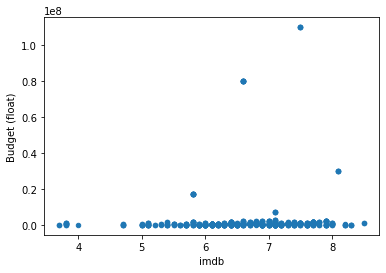

In [69]:
df.plot('imdb','Budget (float)', kind='scatter');

In [70]:
bugget =[]
for i, con in enumerate(df['Budget (float)']):
    if con > .1*1e8 and df['imdb'][i] > 1:
        bugget.append(i)
print(bugget)

[2316, 2317, 2473, 2773, 3680, 3740, 4487, 4488, 4614, 4850, 5173, 5215, 7400, 7401, 7552, 7838, 8667, 8721, 9442, 9443, 9566, 9793, 10104, 10145]


In [71]:
# for i in bugget:
#     print('film name: ', df['title'][i],'  ',df['Budget (float)'][i])

In [72]:
df['Production companies'].head()

0    ['My Four Years in Germany Pictures, Inc.', 'W...
1                                                  NaN
2          ['State Health Films Inc.', 'Warner Bros.']
3                                                  NaN
4                                                  NaN
Name: Production companies, dtype: object

In [73]:
df['Production company'].head()

0                        NaN
1      Warner Bros. Pictures
2                        NaN
3               Warner Bros.
4    Selig Polyscope Company
Name: Production company, dtype: object

In [74]:
df['Production company'].isna().sum()

5823

In [75]:
df.shape

(10175, 27)

In [76]:
df = pd.read_csv('clean_data_till_starring.csv')

In [77]:
# merge Production company and Production companies
df['Production_companies'] = False


for i, con in enumerate(df['Production companies']):
    if not pd.isnull(con):
        con = con.replace('"', "'")
        df['Production_companies'][i] = True
        split_companies = con.split("', '")
        split_companies = split_companies[0].replace("['","")
        split_companies = split_companies.replace("']","")
        if pd.isnull(df['Production company'][i]):   
            df['Production company'][i] = split_companies
            print(split_companies, i)
        else:
            print('Production company in not null: ', df['Production company'][i], i)
    else:
        pass
        #print('nan', i)


<ipython-input-77-c7a4bfe66c33>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Production_companies'][i] = True
<ipython-input-77-c7a4bfe66c33>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Production company'][i] = split_companies


My Four Years in Germany Pictures, Inc. 0
State Health Films Inc. 2
Warner Bros. Pictures 138
Warner Bros. Pictures 174
Film Manufacturing Company 190
First National Pictures, Inc. 195
Walter Morosco Productions 207
First National Pictures 211
First National Pictures 219
First National Pictures 230
First National Pictures 235
Warner Bros. Pictures, Inc. 331
First National Pictures 351
First National Pictures 363
The Vitaphone Corp. 374
Warner Bros. Pictures, Inc. 403
First National Pictures, Inc. 436
Vitaphone 478
Warner Bros. Pictures, Inc. 491
First National Pictures 492
First National Pictures 606
Warner Bros. 629
Warner Bros. Pictures, Inc. 666
Warner Bros. Pictures, Inc. 670
First National Pictures 696
Warner Bros. Pictures, Inc. 703
Warner Bros. Pictures, Inc. 705
Warner Bros. Pictures, Inc. 865
A 953
Warner Bros. Pictures, Inc. 973
Warner Bros. Pictures, Inc. 980
Warner Bros. Pictures, Inc. 982
Warner Bros. Pictures, Inc. 1011
United States Pictures 1056
A. R. Shipman Production

Ánima Estudios 2665
Participant Media 2666
Alcon Entertainment 2667
Metro-Goldwyn-Mayer Pictures 2668
Village Roadshow Pictures 2669
Gesellschaft für feine Filme 2670
Alcon Entertainment 2671
Nostromo Pictures 2672
New Line Cinema 2673
Faliro House Productions 2674
Warner Bros. Pictures 2675
El Deseo 2676
Pressman Film 2677
New Line Cinema 2678
New Line Cinema 2680
Tea Time Film 2681
Silver Pictures 2682
New Line Cinema 2683
New Line Cinema 2684
New Line Cinema 2685
Village Roadshow Pictures 2686
New Line Cinema 2687
Warner Bros. Pictures 2688
Joint Effort 2689
Grimm Pictures 2690
Village Roadshow Pictures 2691
Hellinger / Doll Filmproduktion 2692
Warner Animation Group 2693
British Film Institute 2694
Electric City Entertainment 2695
GyaO 2697
Warner Bros. Pictures 2698
Liden Films 2700
New Line Cinema 2701
RatPac-Dune Entertainment 2702
Hellinger / Doll Filmproduktion 2703
Think Studio 2704
Warner Animation Group 2705
New Line Cinema 2706
Legendary Pictures 2709
New Line Cinema 2711


Warner Bros. Pictures 4480
Gaylord Films 4481
Village Roadshow Pictures 4482
4Kids Entertainment 4483
Castle Rock Entertainment 4485
Intermedia Films 4486
Lakeshore Entertainment 4487
Miramax Films 4488
Warner Bros. Pictures 4490
Castle Rock Entertainment 4491
Village Roadshow Pictures 4492
Alcon Entertainment 4493
Warner Bros. Pictures 4494
The Zanuck Company 4495
DreamWorks Pictures 4496
Team Todd 4497
Franchise Pictures 4498
Burton Projects 4499
Gaylord Films 4500
Participant Productions 4501
Village Roadshow Pictures 4502
Village Roadshow Pictures 4503
Alcon Entertainment 4504
Silver Pictures 4505
Ealing Studios 4507
Virtual Studios 4508
New Dog 4509
Village Roadshow Pictures 4510
Chūkyō Television Broadcasting 4511
Legendary Pictures 4512
Legendary Pictures 4513
Legendary Pictures 4514
Legendary Pictures 4515
Alcon Entertainment 4516
Plan B Entertainment 4517
Telecinco Cinema 4518
Touchstone Pictures 4519
DreamWorks Pictures 4520
Chūkyō Television Broadcasting 4521
Village Roadsho

Warner Bros. Pictures 6674
Warner Bros. 6694
Les Films du Carrosse 6695
Canadian Film Development Corporation 6721
Hiller Productions, Ltd. – Layton 6728
Goodtimes Enterprises 6732
First Artists 6733
Howard R. Schuster, Inc. 6734
Hawk Films 6737
Viaduc Productions 6739
First Artists 6748
Edward Lewis Productions 6751
Warner Bros. 6757
Rastar 6762
International Film Production 6766
Coatesgold 6768
Dovemead Ltd. 6780
Casablanca FilmWorks 6782
First Artists 6790
HandMade Films 6793
Chuck Jones Enterprises 6795
First Artists 6805
The Producer Circle Company 6809
Orion Pictures 6815
Orion Pictures 6822
Dovemead Ltd. 6832
Orion Pictures 6842
Allied Stars Ltd 6846
Orion Pictures 6848
The Ladd Company 6849
Warner Bros. 6851
United Film Distribution Company 6856
Golden Harvest Company 6865
Warner Bros. 6873
Korty Films 6876
Taft Entertainment 6879
Warner Bros. 6884
The Ladd Company 6893
Warner Bros. 6894
Neue Constantin Film 6896
Goldcrest Films 6905
UAA Films 6907
Warner Bros. 6915
Fifteen 691

Alcon Entertainment 7807
Warner Bros. Entertainment Italia, R&C Produzioni, Faros Film 7808
Heyday Films 7809
Alcon Entertainment 7810
Warner Bros. Pictures 7811
New Line Cinema 7812
Metro-Goldwyn-Mayer 7813
Warner Bros. Pictures 7814
New Line Cinema 7815
New Line Cinema 7816
Shochiku 7817
Warner Bros. Pictures 7818
New Line Cinema 7819
Warner Bros. Animation 7821
Gravity Pictures 7822
SK Global Entertainment 7823
New Line Cinema 7824
K&S Films 7825
Nippon TV 7826
Warner Animation Group 7827
Metro-Goldwyn-Mayer 7828
Warner Bros. Pictures 7829
Metro-Goldwyn-Mayer Pictures 7830
Warner Bros. Pictures 7831
Barefoot Films 7832
Imperative Entertainment 7833
Warner Bros. Pictures 7834
Light Chaser Animation Studios 7835
Warner Animation Group 7836
New Line Cinema 7837
A Very Good Production 7838
New Line Cinema 7839
New Line Cinema 7840
Warner Bros. Japan 7841
Legendary Pictures 7842
Warner Bros. Pictures 7843
Legendary Pictures 7844
New Line Cinema 7845
New Line Cinema 7846
New Line Cinema 7

Haut et Court 9540
Daiichi Shokai Co. Ltd. 9542
Columbia Pictures 9543
Legendary Pictures 9544
New Line Cinema 9545
New Line Cinema 9546
Warner Bros. Pictures 9547
Dark Castle Entertainment 9548
New Line Cinema 9549
Imagenation Abu Dhabi 9551
New Line Cinema 9552
Participant Media 9554
Dark Castle Home Entertainment 9555
Radar Pictures 9556
Legendary Pictures 9557
Radar Pictures 9558
Dark Castle Entertainment 9560
Celador Films 9561
Wüste Film 9562
Spyglass Entertainment 9563
Silver Pictures 9564
Alcon Entertainment 9565
GK Films 9566
New Line Cinema 9567
Legendary Pictures 9571
Dark Castle Entertainment 9573
Pathé 9574
New Line Cinema 9575
New Line Cinema 9576
Bandai Visual 9577
Legendary Pictures 9578
Legendary Pictures 9579
CD2 Pictures 9580
Alcon Entertainment 9582
Pathé 9583
New Line Cinema 9585
Legendary Pictures 9586
Village Roadshow Pictures 9587
SevenPictures Film Senator 9588
The Kennedy/Marshall Company 9591
Legendary Pictures 9592
Warner Bros. Pictures 9593
De Line Pictures

In [78]:
# remove the Production companies column

df.drop('Production companies', axis=1, inplace=True)

In [79]:
#df.columns

In [80]:
df['Production_company_missing'] = False
def fill_missing(x):
    if pd.isnull(x):
        return 'missing'
    else:
        return x

df['Production company'] = df['Production company'].apply(lambda x: fill_missing(x))


for i, con in enumerate (df['Production company']):
    if con == 'missing':
        df['Production_company_missing'][i]=True
        

<ipython-input-80-c373d8fb77e5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Production_company_missing'][i]=True


In [81]:
# merge Language and languages
df['several_languages'] = False


for i, con in enumerate(df['Languages']):
    if not pd.isnull(con):
        con = con.replace('"', "'")
        df['several_languages'][i] = True
        split_language = con.split("', '")
        split_language = split_language[0].replace("['","")
        split_language = split_language.replace("']","")
        if pd.isnull(df['Language'][i]):   
            df['Language'][i] = split_language
            print(split_language, i)
        else:
            print('Language in not null: ', df['Language'][i], i)
    else:
        pass
        #print('nan', i

<ipython-input-81-055c16f5d131>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['several_languages'][i] = True
<ipython-input-81-055c16f5d131>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Language'][i] = split_language


Silent film 15
Silent 38
Silent 41
Silent film 63
Silent 72
Silent film 82
Silent film 93
Silent 103
Silent (English intertitles) 107
Silent 108
Silent 111
Silent (English 112
Silent 122
Silent (English titles) 125
Silent 128
Silent 133
Silent (English 141
Silent (English intertitles) 143
Silent 147
Silent 153
Silent 164
Silent 171
English 177
English intertitles 178
Silent 205
Silent 211
Silent film 218
Silent film 227
English (sound version) 249
English 388
English 424
English 547
English, Cantonese 886
English 992
English 1092
Italian 1113
English 1125
English 1251
English 1316
English 1346
English 1364
English 1464
English 1492
English (United States) 1503
English, German 1505
English 1521
Aboriginal languages 1541
English 1544
English 1573
English, Crow, Salish 1574
English 1587
English 1627
English 1632
English 1686
English 1689
English 1692
English 1754
English 1778
English 1811
Cantonese 1832
English 1858
English 1879
English 1880
English 1885
English 1908
English, German 1916


In [82]:
# fill missing data in Language column

df['Language_missing'] = False

def fill_missing(x):
    if pd.isnull(x):
        return 'missing'
    else:
        return x

df['Language'] = df['Language'].apply(lambda x: fill_missing(x))


for i, con in enumerate (df['Language']):
    if con == 'missing':
        df['Language_missing'][i]=True

<ipython-input-82-6fa1baa8c671>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Language_missing'][i]=True


In [83]:
# remove the Languages column

df.drop('Languages', axis=1, inplace=True)

In [84]:
df.to_csv('clean_data_till_language.csv', index=False)

In [155]:
df = pd.read_csv('clean_data_till_language.csv')

In [156]:
df.head()

,title,Directed by,Written by,Produced by,Starring,Country,Language,Running time (int),Budget (float),Box office (float),...,WrittenBy_missing,Writer_split,ProducedBy_missing,split_producedBy,Starring_missing,split_Starring,Production_companies,Production_company_missing,several_languages,Language_missing
0,My Four Years in Germany,William Nigh,Charles A. Logue,Harry Warner,Halbert Brown,United States,Silent (English intertitles ),108.0,NaN,NaN,...,True,0,True,1,True,0,True,False,False,False
1,Kaiser's Finish,John Josseph Harvey,missing,Sam Warner,Earl Schenck,United States,Silent,NaN,NaN,NaN,...,False,0,True,0,True,1,False,False,False,False
2,Open Your Eyes,Gilbert P. Hamilton,C.B. Minty,missing,Faire Binney,United States,Silent (English intertitles ),70.0,NaN,NaN,...,True,1,False,0,True,2,True,False,False,False
3,Beware!,William Nigh,James W. Gerard,missing,Maurine Powers,United States,Silent,9.0,NaN,NaN,...,True,2,False,0,True,3,False,False,False,False
4,The Lost City,E.A. Martin,missing,missing,Juanita Hansen,United States,Silent,15.0,NaN,NaN,...,False,0,False,0,True,4,False,False,False,False


In [157]:
# fill the run time column
df['Running_time_missing'] = False

for i, con in enumerate (df['Running time (int)']):
    if pd.isnull(con):
        df['Running_time_missing'][i] = True
        df['Running time (int)'][i] = df['Running time (int)'].median()
        print(i)
    else:
        pass

<ipython-input-157-0b4b6faeda50>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Running_time_missing'][i] = True
<ipython-input-157-0b4b6faeda50>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Running time (int)'][i] = df['Running time (int)'].median()


1
7
39
67
143
186
195
219
255
277
368
381
393
416
438
449
450
456
459
463
465
491
501
506
509
512
520
525
544
550
556
561
565
576
589
591
611
644
666
681
767
776
779
803
832
880
892
944
952
989
998
1022
1140
1163
1256
1330
1392
1450
1484
1491
1525
1598
1713
1845
2052
2223
2406
2420
2494
2501
2516
2536
2538
2642
2699
2708
2752
2765
2824
2825
2826
2828
2829
2830
2831
2832
2833
2834
2835
2836
2837
2838
2840
2841
2843
2844
2845
2846
2848
2849
2850
2852
2859
2869
2898
2914
2946
3036
3066
3145
3157
3160
3162
3178
3180
3182
3198
3201
3205
3209
3215
3221
3231
3239
3246
3277
3279
3280
3310
3325
3341
3375
3462
3663
3693
3715
3737
3748
3749
3750
3751
3754
3834
3853
3924
3927
3942
4157
4559
4633
4667
4796
4842
4893
4894
4895
4897
4898
4899
4900
4901
4902
4903
4904
4905
4906
4907
4909
4910
4911
4913
4914
4915
4987
5013
5020
5159
5184
5222
5223
5224
5225
5246
5274
5299
5391
5399
5418
5445
5462
5557
5567
5585
5604
5615
5616
5622
5625
5628
5630
5654
5664
5669
5672
5675
5682
5685
5703
5709
5715
5718
57

In [158]:
# fill the Buget row using avrage price that need for each make a min of film 



def avrage_cost(cost, start_year, end_year ):
    all_costs = []
    for i , con in enumerate(df['Year_release']):
        if (df['Year_release'].min()+start_year) <= con <= (df['Year_release'].min()+ end_year):
            if not pd.isna(cost[i]):
                all_costs.append(cost[i])
    #print(all_costs, np.mean(all_costs) )
    return round(np.mean(all_costs))

def avarage_time(minOfMovie, start_year, end_year):
    all_times = []
    for i , con in enumerate(df['Year_release']):
            if (df['Year_release'].min()+start_year) <= con <= (df['Year_release'].min()+ end_year):
                 all_times.append(minOfMovie[i])
    #print(all_times, np.mean(all_times))
    return round(np.mean(all_times))


def fill_missing_money(x, minOfMovie, missing):
    for i in range(0, (df['Year_release'].max()-df['Year_release'].min()), 10):
        avrage = avrage_cost(x, i, i+10) // avarage_time(minOfMovie, i, i+10)
        for j, con in enumerate(minOfMovie):
            if (df['Year_release'].min()+i) <= (df['Year_release'][j]) <= (df['Year_release'].min()+(i+10)):
                if pd.isnull(x[j]):
                    missing[i] = True
                    x[j] = avrage * con
                    #print(j, x[j], avrage, con, df['Year_release'][j])
                else:
                    pass
            else:
                pass

In [159]:
df['Budget_missing'] = False
fill_missing_money(df['Budget (float)'], df['Running time (int)'], df['Budget_missing'])

<ipython-input-158-55c3da02f39e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing[i] = True
<ipython-input-158-55c3da02f39e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[j] = avrage * con


In [160]:
df['boxOffice_missing'] = False
fill_missing_money(df['Box office (float)'], df['Running time (int)'], df['boxOffice_missing'])

<ipython-input-158-55c3da02f39e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing[i] = True
<ipython-input-158-55c3da02f39e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[j] = avrage * con


In [162]:
df['imdb_missing'] = False
for i, con in enumerate(df['imdb']):
    if pd.isna(con):
        df['imdb_missing'][i] = True
        df['imdb'][i] = df['imdb'].median() 

        

<ipython-input-162-5f3b8c88fbf1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['imdb_missing'][i] = True
<ipython-input-162-5f3b8c88fbf1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['imdb'][i] = df['imdb'].median()


In [163]:
df['imdb'].median() 

6.3

In [165]:
df.to_csv('cleaned_data.csv', index=False)